# <center><b>NN - Project Part One</b></center>

In [1]:
# For removal of the warnings
import warnings
warnings.filterwarnings("ignore")

# For handling randomness in the output of the models
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# DL related libraries
%tensorflow_version 2.x
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping
from keras.models import load_model


##1. Import data

In [2]:
# The project file has already been uploaded to personal Drive for usage directly

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the dataset by reading the appropriate CSV file

data = pd.read_csv('/content/drive/MyDrive/Colab Data/NN_Project_Part_One/Part- 1 - Signal.csv')

In [4]:
# To check the data, displaying the first and last 5 rows

data

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0             7.4        0.700  ...           9.4                5
1             7.8        0.880  ...           9.8                5
2             7.8        0.760  ...           9.8                5
3            11.2        0.280  ...           9.8                6
4             7.4        0.700  ...           9.4                5
...           ...          ...  ...           ...              ...
1594          6.2        0.600  ...          10.5                5
1595          5.9        0.550  ...          11.2                6
1596          6.3        0.510  ...          11.0                6
1597          5.9        0.645  ...          10.2                5
1598          6.0        0.310  ...          11.0                6

[1599 rows x 12 columns]

## 2. Data analysis & visualisation

### <center>Perform relevant and detailed statistical analysis on the data</center>

### <center>Perform relevant and detailed uni, bi and multi variate analysis</center>

In [5]:
# Gathering informantion about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Checking number of default rows vs columns

data.shape

(1599, 12)

In [7]:
# Checking for total number of null values in each column

data.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [8]:
# Describing the dataset
# Including all the data types

data.describe(include='all')

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.319637     0.527821  ...     10.422983         5.636023
std       1.741096     0.179060  ...      1.065668         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      15.900000     1.580000  ...     14.900000         8.000000

[8 rows x 12 columns]

In [9]:
# Identify duplicate records in the data

dupes = data.duplicated()
sum(dupes)

240

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

We can see some duplicates in our data which needs to be removed to prevent bias from our data.

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(1359, 12)

Here we can see that we dropped the duplicates from our data.

In [13]:
# Filtering numerical independent columns
# As we we have only float type for such we can filter out accordingly

numerics = ['float16', 'float32', 'float64']
num_cols = data.select_dtypes(include=numerics).columns.to_list()

In [14]:
num_cols

['Parameter 1',
 'Parameter 2',
 'Parameter 3',
 'Parameter 4',
 'Parameter 5',
 'Parameter 6',
 'Parameter 7',
 'Parameter 8',
 'Parameter 9',
 'Parameter 10',
 'Parameter 11']

In [15]:
# Function for numeric's analysis of each column passed as a list
# Min, Max, Range, Mean, Median, Standard Deviation, Skewness, Kurtosis

def uva_num(data, data_group):
  
  ''' 
  Univariate Analysis for Numeric:
  takes a group of variables (INTEGER and FLOAT) and plots all the descriptives and properties along with KDE.\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n

  '''  

  
  size = len(data_group)
  plt.figure(figsize = (8*size,3), dpi = 100)
  
  # Looping for each variable

  for j,i in enumerate(data_group):
    
    # Calculating descriptives of variable
    
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # Calculating points of standard deviation
    
    points = mean-st_dev, mean+st_dev
    
    # Plotting with every information
    
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True,color ='black',alpha=0.5)
    sns.lineplot(points, [0,0], color = 'yellow', label = "std_dev",linewidth = 2.5)
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i))
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),
                                                                                                    round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

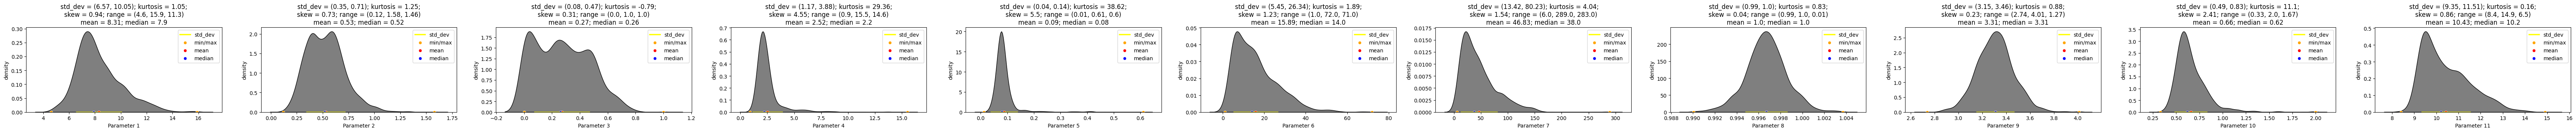

In [16]:
uva_num(data,num_cols)

- Most of the distributions are positively skewed(moderately and high).
- By observing the above graphs and data we can see that most of the variables depicts Leptokurtic distribution.

- So, by observing both kurtosis and skewness, we can sense that in case of most of the variables we have some outliers.
- We can also observe prescence of multiple clusters in the data.

In [17]:
# Custom function for outlier analysis

def uva_outlier(data, data_group, include_outlier = True):
  
  '''
  Univariate Analysis for Outlier:
  takes a group of variables (INTEGER and FLOAT) and plot boxplot and descriptives\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n
  
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(data_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  # Looping for each variable
  
  for j,i in enumerate(data_group):
    
    # Calculating the descriptives
    
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating number of outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      
      # Plotting with every information
      
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v",color='Cyan')
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      
      # Replacing outliers with max/min whisker
      
      data2 = data[data_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # Plotting without outliers
        
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

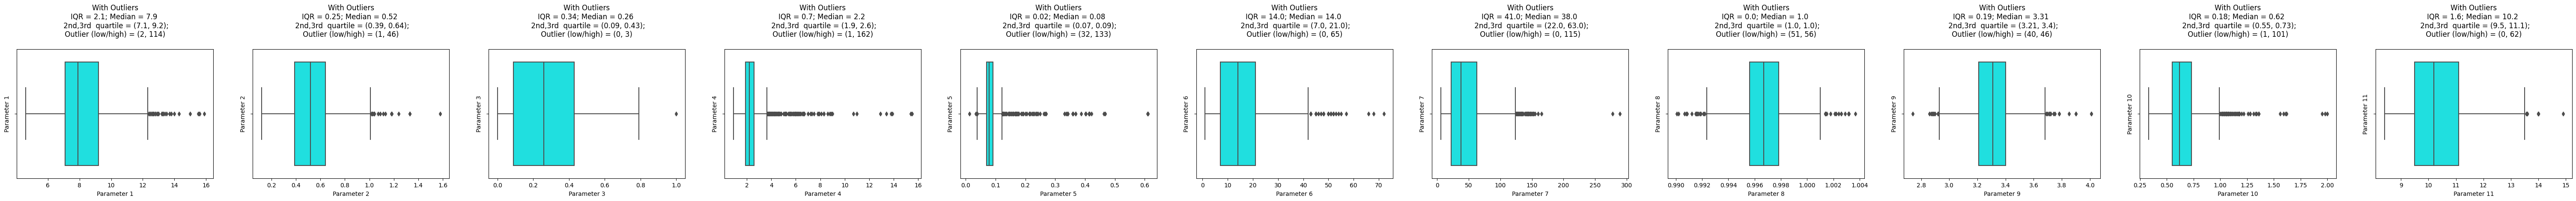

In [18]:
# Representation of data with outliers

uva_outlier(data, num_cols)

We can see the outliers in our data and same will removed so that it doesn't affect the performance

In [19]:
# Replacing outliers with upper whisker value

for i in num_cols:
    data[i].quantile(0.25), data[i].quantile(0.75)
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    whisker_1 = Q1 - (1.5*IQR)
    whisker_2 = Q3 + (1.5*IQR)
    data[i].loc[data[i]>whisker_2] = whisker_2
    data[i].loc[data[i]<whisker_1] = whisker_1


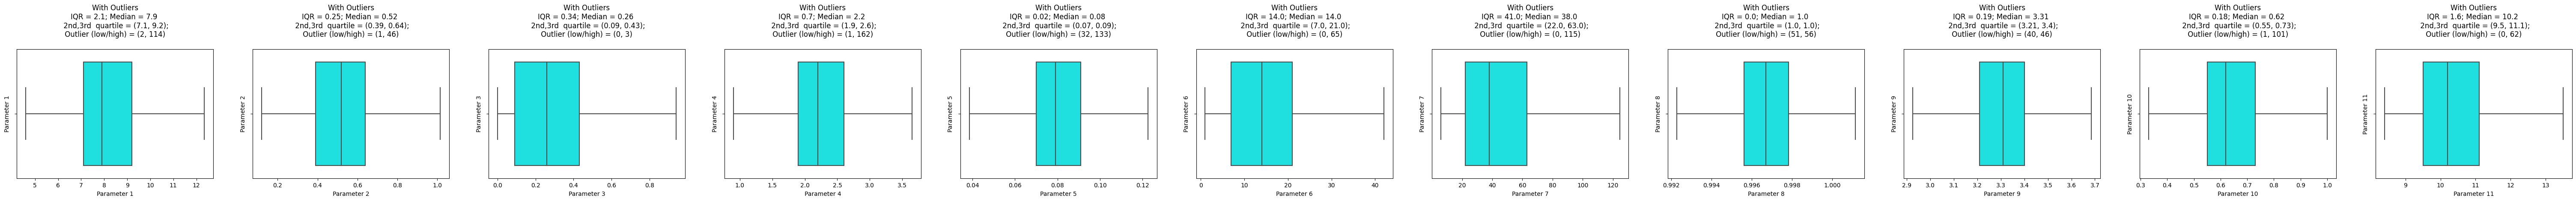

In [20]:
# Representation of data without outliers

uva_outlier(data, num_cols)

We can see that the outliers have been handled

<b>Note:</b> Though the project requirements states the model to be a regressor but for our analysis we can treat the output variable to be categorical and get insights

In [21]:
# Filtering categorical columns for understanding

numerics = ['float16', 'float32', 'float64']
cat_cols = data.select_dtypes(exclude = numerics).columns.to_list()

In [22]:
cat_cols

['Signal_Strength']

In [23]:
# Percentage of each of the six class in the data

data[cat_cols].value_counts(normalize=True)*100

Signal_Strength
5                  42.457689
6                  39.367182
7                  12.288447
4                   3.899926
8                   1.250920
3                   0.735835
dtype: float64

In [24]:
# Checking distribution of data points across classes of 'Signal_Strength'

data.groupby(['Signal_Strength']).count()

Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
Signal_Strength                            ...                            
3                         10           10  ...            10            10
4                         53           53  ...            53            53
5                        577          577  ...           577           577
6                        535          535  ...           535           535
7                        167          167  ...           167           167
8                         17           17  ...            17            17

[6 rows x 11 columns]

In [25]:
# Calculating correlation

corr = data[num_cols].corr()
corr

Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
Parameter 1      1.000000    -0.267421  ...      0.224572     -0.071651
Parameter 2     -0.267421     1.000000  ...     -0.311123     -0.205689
Parameter 3      0.672454    -0.560157  ...      0.345605      0.106349
Parameter 4      0.214733     0.038673  ...      0.018561      0.109226
Parameter 5      0.218094     0.141735  ...      0.127595     -0.306170
Parameter 6     -0.142253    -0.012927  ...      0.049309     -0.081324
Parameter 7     -0.109957     0.088597  ...     -0.005515     -0.244589
Parameter 8      0.669601     0.021525  ...      0.157616     -0.508409
Parameter 9     -0.693462     0.248465  ...     -0.154669      0.202165
Parameter 10     0.224572    -0.311123  ...      1.000000      0.157635
Parameter 11    -0.071651    -0.205689  ...      0.157635      1.000000

[11 rows x 11 columns]

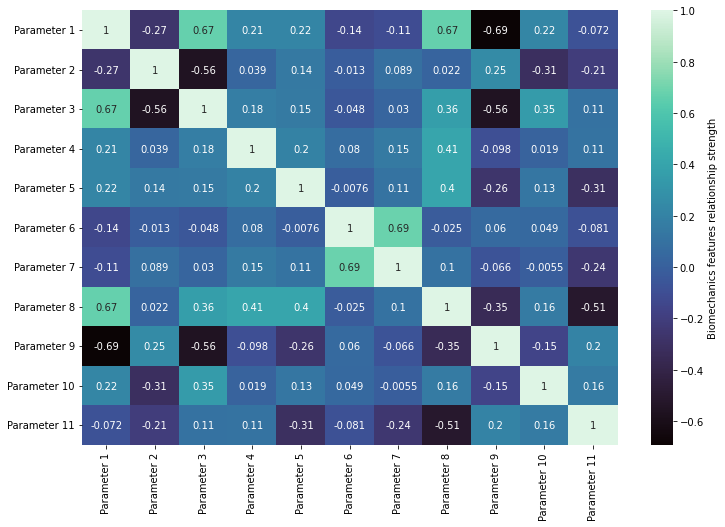

In [26]:
# Plotting the heatmap for the respective correlation

plt.figure(figsize=(12,8))

sns.heatmap(corr,annot=True,cbar_kws={'label': 'Biomechanics features relationship strength'},cmap='mako');

In [27]:
# Representing correlation values in hierarchy (Descending order)

df_corr = pd.DataFrame(corr.abs().unstack().sort_values(ascending=False), columns=['Correlation'])
df_corr[len(num_cols):]

Correlation
Parameter 1  Parameter 9      0.693462
Parameter 9  Parameter 1      0.693462
Parameter 7  Parameter 6      0.685832
Parameter 6  Parameter 7      0.685832
Parameter 1  Parameter 3      0.672454
...                                ...
Parameter 6  Parameter 2      0.012927
             Parameter 5      0.007580
Parameter 5  Parameter 6      0.007580
Parameter 7  Parameter 10     0.005515
Parameter 10 Parameter 7      0.005515

[110 rows x 1 columns]

We can observe decent correlation between some of the independent variables while most of them are low so we are good on the multicollinearity side

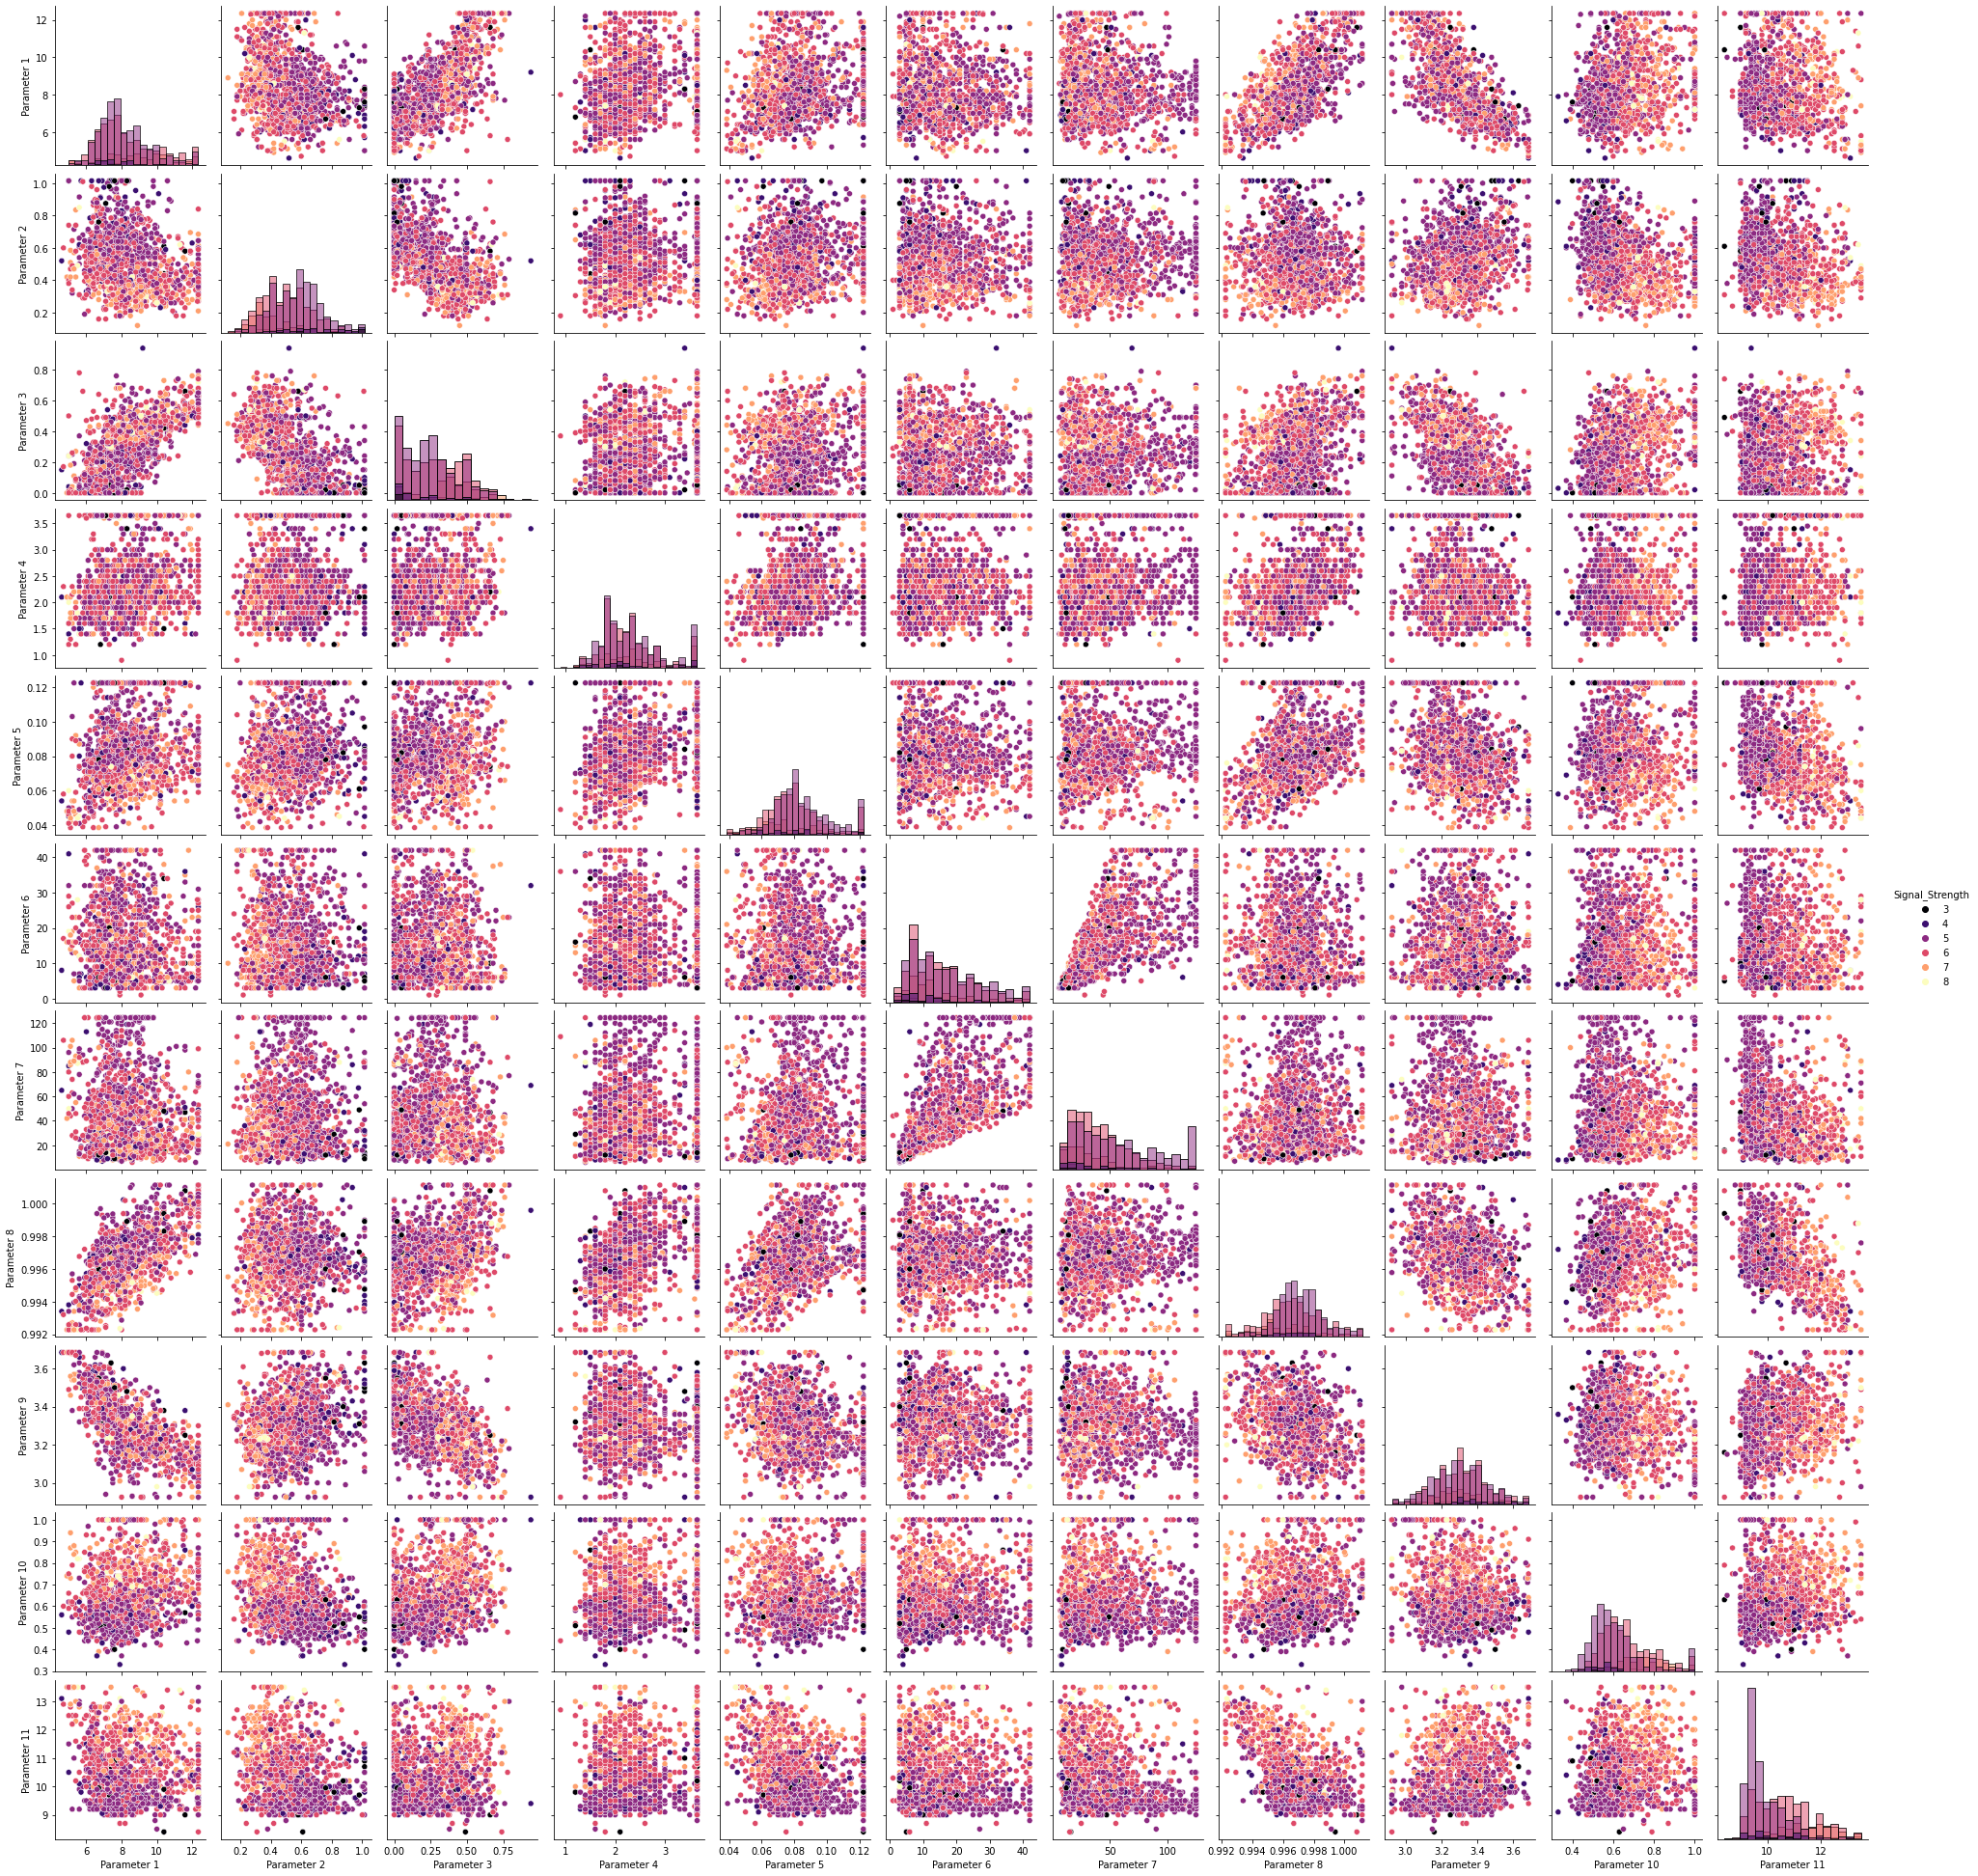

In [28]:
# Plot to check the correlation

sns.pairplot(data,hue='Signal_Strength',diag_kind='hist',palette='magma');

Relationship trend can be observed from the above graph as well which depicts abscence of strong correlation

In [29]:
# Creating the pivot table based on 'Signal_Strength' column
# Using aggregate function as mean by default

pd.pivot_table(data, index =['Signal_Strength'])


Parameter 1  Parameter 10  ...  Parameter 8  Parameter 9
Signal_Strength                             ...                          
3                   8.360000      0.570000  ...     0.997464     3.398000
4                   7.776415      0.573774  ...     0.996542     3.379717
5                   8.145667      0.612652  ...     0.997066     3.300806
6                   8.314112      0.667869  ...     0.996572     3.316150
7                   8.808084      0.738383  ...     0.996055     3.289222
8                   8.426471      0.768824  ...     0.995215     3.274706

[6 rows x 11 columns]

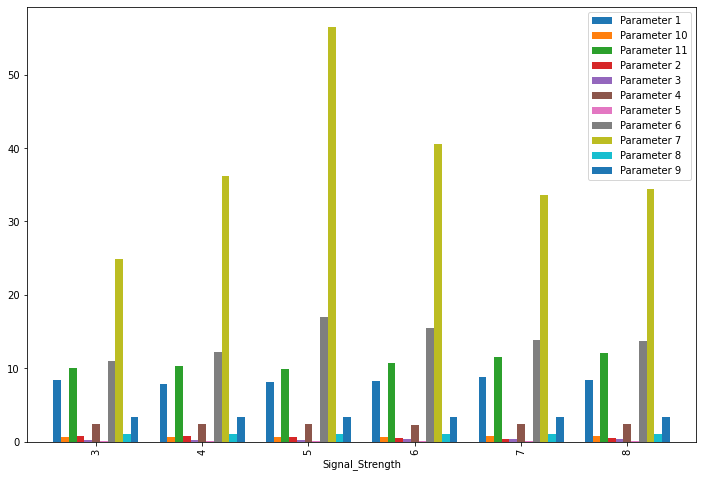

In [30]:
# Plotting the above values

pd.pivot_table(data, index =['Signal_Strength']).plot(kind='bar',figsize=(12,8),width =0.8);


As can be see the highest average value for Parameter 7 and Parameter 5 the least

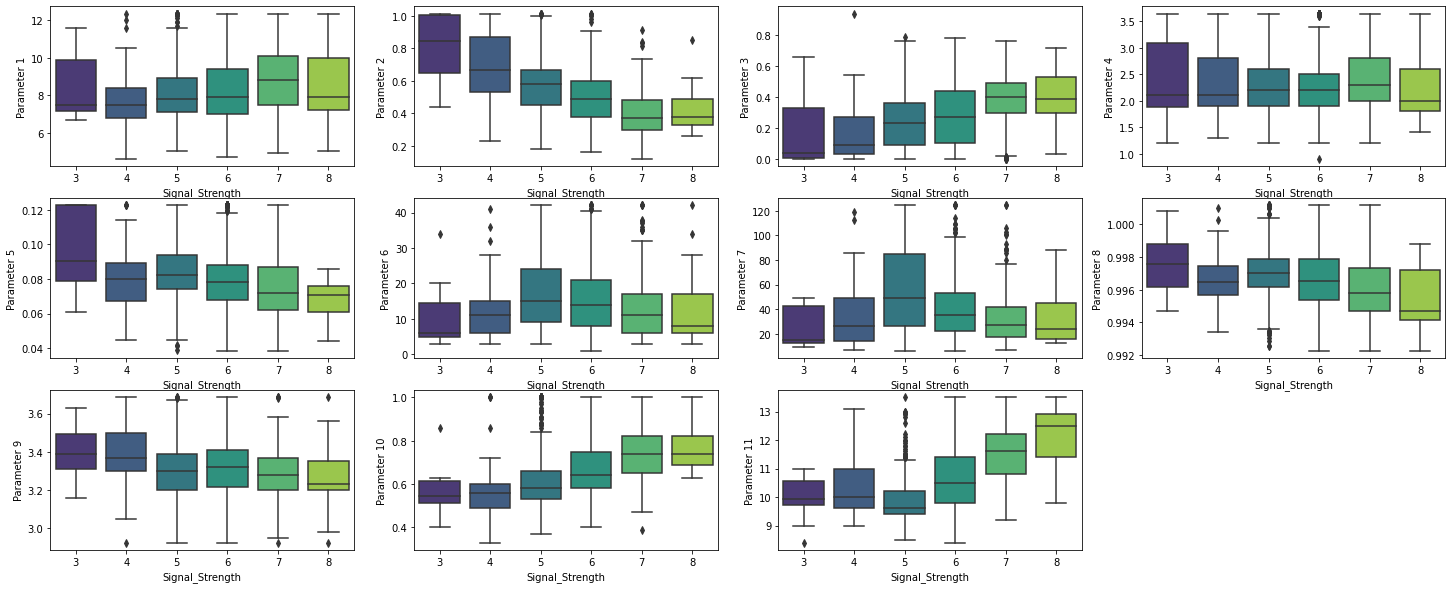

In [31]:
# Creating boxplot for each variable  based on each output of the target variable

plt.figure(figsize=(25,10))
for i, j in enumerate(data[num_cols]):
    plt.subplot(3,4,i+1)
    sns.boxplot(x='Signal_Strength', y=j, data=data,palette='viridis')



For each value of the output the distribution of parameters has been shown in the graph above

## 3. Design, train, tune and test a neural network regressor

In [32]:
# Splitting the target and features

X = data.drop('Signal_Strength',axis=1)  
y = data['Signal_Strength']               

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [34]:
# Scaling training and test data

X_train_scaled = StandardScaler().fit_transform(X_train)   

X_test_scaled = StandardScaler().fit_transform(X_test)     

In [35]:
# Function to create multiple ANN models using different values for hyperparameters

def ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag):

    ''' 
    ann_model: Takes a group of variables and creates the model and returns it\n
    
    num_layers : Number of layes in NN\n
    
    hidden_neurons : Number of neurons for first layer which gets halved with increase in each layer\n

    bn_flag : To add Batch Normalisation\n

    activation : Type of activation function\n
    
    do_flag : To add Dropout\n

    do_val : Probability for Dropout\n

    kernel_initializer : Values for weights initialisation\n

    lr : Learning rate\n

    Lambda : Regularisation parameter\n

    optimizer_flag : To choose the optimizer as SGD or Adam\n
    
    '''

    # Model architecture
    
    output_neurons = 1
       
    model = Sequential()

    if (num_layers == 1) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
    elif (num_layers == 2) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
    elif (num_layers == 3) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
    elif (num_layers == 4) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2) , kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/8), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
    elif (num_layers == 5) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2) , kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/8), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/12), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
    else:
      print('The number of layers not within desired range')

    sgd = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    adam = keras.optimizers.Adam(learning_rate=lr)
    
    # Compiling model
    
    if optimizer_flag == 1:
      model.compile(loss='mean_absolute_error', optimizer=sgd)
    elif optimizer_flag == 2:
      model.compile(loss='mean_absolute_error', optimizer=adam)

    return model 

**Model 1**

In [36]:
# Choosing the hyperparameters
# Selecting the basic values initially

num_layers = 1 
hidden_neurons = 200
bn_flag = 0
activation = 'sigmoid'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [37]:
model_1 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2400      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Parameter values for fitting the model

epochs = 100
batch_size = 100

In [40]:
# Fitting the model

model_1_fit = model_1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 6.1751 - val_loss: 5.9975
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 5.8173 - val_loss: 5.5351
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 5.3198 - val_loss: 5.0048
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 4.7785 - val_loss: 4.4532
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 4.2235 - val_loss: 3.8950
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 3.6641 - val_loss: 3.3346
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 3.1034 - val_loss: 2.7735
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 2.5448 - val_loss: 2.2205
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 1.9931 - val_loss: 1.6745
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 1.4617 - val_loss: 1.1835
Epoch 11

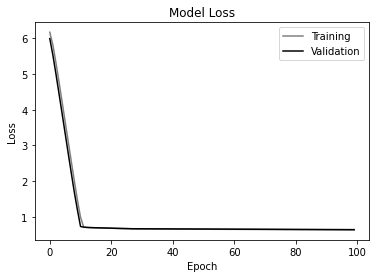

In [41]:
# Summarizing the history for loss

plt.plot(model_1_fit.history['loss'],color = 'Grey')
plt.plot(model_1_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 2**

Let's us try to increase the epochs and change the activation function to capture non-linearity

In [42]:
num_layers = 1 
hidden_neurons = 200
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [43]:
model_2 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [44]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               2400      
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Parameter values for fitting the model

epochs = 500
batch_size = 100

In [46]:
# Fitting the model

model_2_fit = model_2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/500
11/11 [==============================] - 0s 16ms/step - loss: 5.6343 - val_loss: 5.6246
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 5.6190 - val_loss: 5.6048
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 5.5977 - val_loss: 5.5820
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 5.5745 - val_loss: 5.5584
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 5.5508 - val_loss: 5.5346
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 5.5268 - val_loss: 5.5107
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 5.5029 - val_loss: 5.4867
Epoch 8/500
11/11 [==============================] - 0s 5ms/step - loss: 5.4789 - val_loss: 5.4626
Epoch 9/500
11/11 [==============================] - 0s 5ms/step - loss: 5.4547 - val_loss: 5.4385
Epoch 10/500
11/11 [==============================] - 0s 5ms/step - loss: 5.4306 - val_loss: 5.4142
Epoch 11

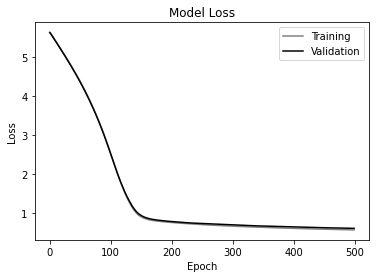

In [47]:
# Summarizing the history for loss

plt.plot(model_2_fit.history['loss'],color = 'Grey')
plt.plot(model_2_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

We can see that the loss function has smoothened up

**Model 3**

Let's try early stopping to pause the iterations aptly amd at the same time let's increase the epochs

In [48]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [49]:
num_layers = 1 
hidden_neurons = 200
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [50]:
model_3 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [51]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               2400      
                                                                 
 activation_2 (Activation)   (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 100

In [53]:
# Fitting the model

model_3_fit = model_3.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
11/11 [==============================] - 1s 18ms/step - loss: 5.5567 - val_loss: 5.5458
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.5419 - val_loss: 5.5268
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.5214 - val_loss: 5.5049
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.4991 - val_loss: 5.4822
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.4761 - val_loss: 5.4591
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.4530 - val_loss: 5.4360
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.4298 - val_loss: 5.4128
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.4066 - val_loss: 5.3896
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.3833 - val_loss: 5.3663
Epoch 10/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.3599 - val_loss: 5.342

Thus, we can see that after 585 epochs the loss becomes quite stagnant as per the given criteria for early stopping

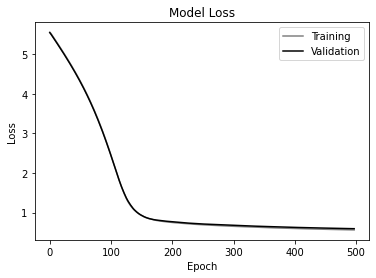

In [54]:
# Summarizing the history for loss

plt.plot(model_3_fit.history['loss'],color = 'Grey')
plt.plot(model_3_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 4**

Let us increase the number of hidden layers and keep rest the same as the last model

In [55]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [56]:
num_layers = 4 
hidden_neurons = 200
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [57]:
model_4 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [58]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               2400      
                                                                 
 activation_3 (Activation)   (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 activation_5 (Activation)   (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 25)               

In [59]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 100

In [60]:
# Fitting the model

model_4_fit = model_4.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
11/11 [==============================] - 1s 20ms/step - loss: 5.6238 - val_loss: 5.6167
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.6166 - val_loss: 5.6074
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.6066 - val_loss: 5.5968
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5958 - val_loss: 5.5858
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5847 - val_loss: 5.5746
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5735 - val_loss: 5.5635
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 5.5624 - val_loss: 5.5523
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5512 - val_loss: 5.5411
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5401 - val_loss: 5.5300
Epoch 10/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5289 - val_loss: 5.518

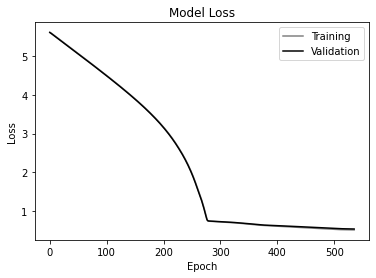

In [61]:
# Summarizing the history for loss

plt.plot(model_4_fit.history['loss'],color = 'Grey')
plt.plot(model_4_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 5**

Let us now add hidden neurons to the previous model as the loss is the least for it currently

In [62]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [63]:
num_layers = 4 
hidden_neurons = 1000
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [64]:
model_5 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [65]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1000)              12000     
                                                                 
 activation_7 (Activation)   (None, 1000)              0         
                                                                 
 dense_12 (Dense)            (None, 500)               500500    
                                                                 
 activation_8 (Activation)   (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 250)               125250    
                                                                 
 activation_9 (Activation)   (None, 250)               0         
                                                                 
 dense_14 (Dense)            (None, 125)              

In [66]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 100

In [67]:
# Fitting the model

model_5_fit = model_5.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 5.6656 - val_loss: 5.6580
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.6537 - val_loss: 5.6427
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.6373 - val_loss: 5.6251
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.6196 - val_loss: 5.6071
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.6016 - val_loss: 5.5890
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5835 - val_loss: 5.5710
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5655 - val_loss: 5.5529
Epoch 8/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.5476 - val_loss: 5.5349
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5296 - val_loss: 5.5170
Epoch 10/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.5117 - val_loss: 5.499

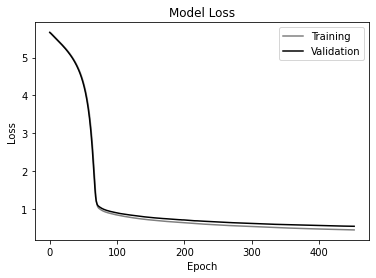

In [68]:
# Summarizing the history for loss

plt.plot(model_5_fit.history['loss'],color = 'Grey')
plt.plot(model_5_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 6**

Lets use the previous model as training loss is less compared to the previous best and change the batch size

In [69]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [70]:
num_layers = 4 
hidden_neurons = 1000
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [71]:
model_6 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [72]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1000)              12000     
                                                                 
 activation_11 (Activation)  (None, 1000)              0         
                                                                 
 dense_17 (Dense)            (None, 500)               500500    
                                                                 
 activation_12 (Activation)  (None, 500)               0         
                                                                 
 dense_18 (Dense)            (None, 250)               125250    
                                                                 
 activation_13 (Activation)  (None, 250)               0         
                                                                 
 dense_19 (Dense)            (None, 125)              

In [73]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 50

In [74]:
# Fitting the model

model_6_fit = model_6.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
21/21 [==============================] - 1s 11ms/step - loss: 5.5967 - val_loss: 5.5774
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.5655 - val_loss: 5.5417
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.5286 - val_loss: 5.5041
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.4905 - val_loss: 5.4658
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.4518 - val_loss: 5.4267
Epoch 6/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.4121 - val_loss: 5.3866
Epoch 7/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.3712 - val_loss: 5.3452
Epoch 8/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.3290 - val_loss: 5.3023
Epoch 9/1000
21/21 [==============================] - 0s 4ms/step - loss: 5.2851 - val_loss: 5.2575
Epoch 10/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.2392 - val_loss: 5.210

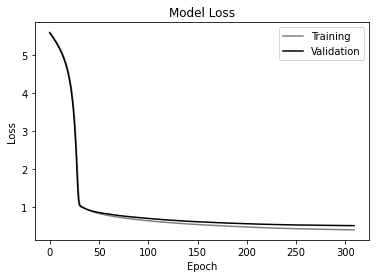

In [75]:
# Summarizing the history for loss

plt.plot(model_6_fit.history['loss'],color = 'Grey')
plt.plot(model_6_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 7**

Let's now add batch normalization and check the results

In [76]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [77]:
num_layers = 4 
hidden_neurons = 1000
bn_flag = 1
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [78]:
model_7 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [79]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              12000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation_15 (Activation)  (None, 1000)              0         
                                                                 
 dense_22 (Dense)            (None, 500)               500500    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_16 (Activation)  (None, 500)              

In [80]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 50

In [81]:
# Fitting the model

model_7_fit = model_7.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
21/21 [==============================] - 2s 18ms/step - loss: 5.7314 - val_loss: 5.5903
Epoch 2/1000
21/21 [==============================] - 0s 8ms/step - loss: 5.3723 - val_loss: 5.5163
Epoch 3/1000
21/21 [==============================] - 0s 7ms/step - loss: 4.9478 - val_loss: 5.3998
Epoch 4/1000
21/21 [==============================] - 0s 8ms/step - loss: 4.5189 - val_loss: 5.2380
Epoch 5/1000
21/21 [==============================] - 0s 7ms/step - loss: 4.0875 - val_loss: 5.0319
Epoch 6/1000
21/21 [==============================] - 0s 7ms/step - loss: 3.6574 - val_loss: 4.7842
Epoch 7/1000
21/21 [==============================] - 0s 8ms/step - loss: 3.2238 - val_loss: 4.4958
Epoch 8/1000
21/21 [==============================] - 0s 8ms/step - loss: 2.7952 - val_loss: 4.1735
Epoch 9/1000
21/21 [==============================] - 0s 8ms/step - loss: 2.3861 - val_loss: 3.8233
Epoch 10/1000
21/21 [==============================] - 0s 8ms/step - loss: 2.0106 - val_loss: 3.455

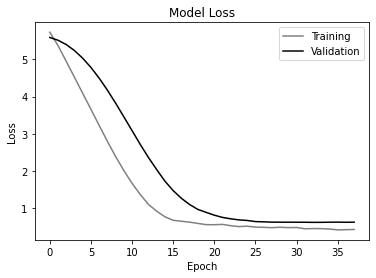

In [82]:
# Summarizing the history for loss

plt.plot(model_7_fit.history['loss'],color = 'Grey')
plt.plot(model_7_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 8**

As we can see that batch normalisation reduced the training loss but validation loss was comparatively high so let's try dropout for some regularisation and check the results

In [83]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min')

In [84]:
num_layers = 4 
hidden_neurons = 1000
bn_flag = 1
activation = 'relu'
do_flag = 1
do_val = 0.2
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [85]:
model_8 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [86]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1000)              12000     
                                                                 
 batch_normalization_4 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 activation_19 (Activation)  (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_27 (Dense)            (None, 500)               500500    
                                                                 
 batch_normalization_5 (Batc  (None, 500)              2000      
 hNormalization)                                      

In [87]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 50

In [88]:
# Fitting the model

model_8_fit = model_8.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
21/21 [==============================] - 2s 18ms/step - loss: 5.7848 - val_loss: 5.5972
Epoch 2/1000
21/21 [==============================] - 0s 8ms/step - loss: 5.4445 - val_loss: 5.5084
Epoch 3/1000
21/21 [==============================] - 0s 8ms/step - loss: 5.0299 - val_loss: 5.3851
Epoch 4/1000
21/21 [==============================] - 0s 8ms/step - loss: 4.5978 - val_loss: 5.2247
Epoch 5/1000
21/21 [==============================] - 0s 8ms/step - loss: 4.1856 - val_loss: 5.0299
Epoch 6/1000
21/21 [==============================] - 0s 7ms/step - loss: 3.7663 - val_loss: 4.8065
Epoch 7/1000
21/21 [==============================] - 0s 8ms/step - loss: 3.3242 - val_loss: 4.5523
Epoch 8/1000
21/21 [==============================] - 0s 8ms/step - loss: 2.9022 - val_loss: 4.2849
Epoch 9/1000
21/21 [==============================] - 0s 8ms/step - loss: 2.5229 - val_loss: 4.0001
Epoch 10/1000
21/21 [==============================] - 0s 8ms/step - loss: 2.1528 - val_loss: 3.715

Adding dropout with batch normalisation didn't give good results relatively

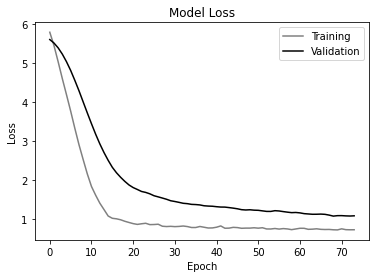

In [89]:
# Summarizing the history for loss

plt.plot(model_8_fit.history['loss'],color = 'Grey')
plt.plot(model_8_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 9**

Let's try dropout without batch normalization

In [90]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, mode='min')

In [91]:
num_layers = 4 
hidden_neurons = 1000
bn_flag = 0
activation = 'relu'
do_flag = 1
do_val = 0.2
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [92]:
model_9 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [93]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1000)              12000     
                                                                 
 activation_23 (Activation)  (None, 1000)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_32 (Dense)            (None, 500)               500500    
                                                                 
 activation_24 (Activation)  (None, 500)               0         
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_33 (Dense)            (None, 250)              

In [94]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 50

In [95]:
# Fitting the model

model_9_fit = model_9.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
21/21 [==============================] - 1s 12ms/step - loss: 5.5527 - val_loss: 5.5452
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.5165 - val_loss: 5.5071
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.4757 - val_loss: 5.4665
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.4311 - val_loss: 5.4246
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.3859 - val_loss: 5.3808
Epoch 6/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.3399 - val_loss: 5.3352
Epoch 7/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.2906 - val_loss: 5.2869
Epoch 8/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.2390 - val_loss: 5.2356
Epoch 9/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.1816 - val_loss: 5.1802
Epoch 10/1000
21/21 [==============================] - 0s 5ms/step - loss: 5.1229 - val_loss: 5.120

We can see that dropout as a regularization measure is not working and hence we won't use it further

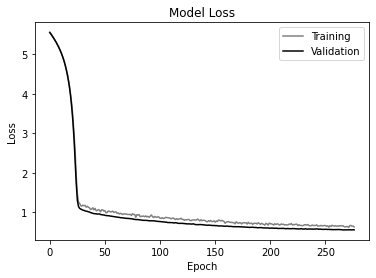

In [96]:
# Summarizing the history for loss

plt.plot(model_9_fit.history['loss'],color = 'Grey')
plt.plot(model_9_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Model 10** 

Let's try tweaking other hyperparameters if we can get better results

In [97]:
# Setting up early stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, mode='min')

In [98]:
num_layers = 4 
hidden_neurons = 1000
bn_flag = 0
activation = keras.layers.LeakyReLU(alpha=0.01)
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.003
Lambda = 0
optimizer_flag = 1

In [99]:
model_10 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [100]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1000)              12000     
                                                                 
 activation_27 (Activation)  (None, 1000)              0         
                                                                 
 dense_37 (Dense)            (None, 500)               500500    
                                                                 
 activation_28 (Activation)  (None, 500)               0         
                                                                 
 dense_38 (Dense)            (None, 250)               125250    
                                                                 
 activation_29 (Activation)  (None, 250)               0         
                                                                 
 dense_39 (Dense)            (None, 125)              

In [101]:
# Parameter values for fitting the model

epochs = 1000
batch_size = 100

In [102]:
# Fitting the model

model_10_fit = model_10.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose = 1)

Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 5.6221 - val_loss: 5.4524
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.2863 - val_loss: 5.0210
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 4.7669 - val_loss: 4.3051
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 3.6640 - val_loss: 2.1428
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 1.5111 - val_loss: 1.1115
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 1.1363 - val_loss: 0.8923
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.8549 - val_loss: 0.7953
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.7533 - val_loss: 0.7448
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6944 - val_loss: 0.7197
Epoch 10/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6515 - val_loss: 0.681

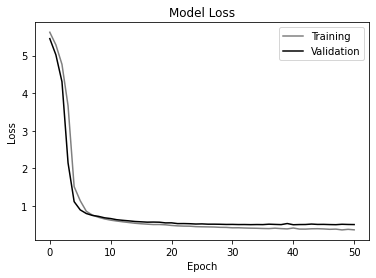

In [103]:
# Summarizing the history for loss

plt.plot(model_10_fit.history['loss'],color = 'Grey')
plt.plot(model_10_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## 4. Pickle the model for future use

We will pickle model 10 as we get the minimal loss for this 

In [104]:
# Pickling / Saving the model
# With h5 file extension

model_10.save('My_Final_Model.h5') 

In [105]:
# Loading the model to check the availibility

Final_Model_Loaded = load_model('My_Final_Model.h5')

In [106]:
# Summary of the saved model

Final_Model_Loaded.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1000)              12000     
                                                                 
 activation_27 (Activation)  (None, 1000)              0         
                                                                 
 dense_37 (Dense)            (None, 500)               500500    
                                                                 
 activation_28 (Activation)  (None, 500)               0         
                                                                 
 dense_38 (Dense)            (None, 250)               125250    
                                                                 
 activation_29 (Activation)  (None, 250)               0         
                                                                 
 dense_39 (Dense)            (None, 125)              

# <center><b>NN - Project Part Two</b></center>

In [107]:
# For removal of the warnings
import warnings
warnings.filterwarnings("ignore")


# For handling randomness in the output of the models
import numpy as np
import tensorflow as tf
np.random.seed(101)
tf.random.set_seed(101)


# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import h5py


# DL related libraries
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout
from keras import regularizers, optimizers
from keras.models import load_model

## 1. Import the data

In [108]:
# Mounting the drive as the data file given is too big for session storage
# The project file has already been uploaded to personal Drive for usage directly

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
# Using suitable associated library to access the file given in the project
# Accessing the file in read only mode

h5_data = h5py.File('/content/drive/MyDrive/Colab Data/NN_Project_Part_Two/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

## 2. Data pre-processing and visualisation

In [110]:
# Checking the keys in the file after reading to extract and structure the information

h5_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [111]:
# Extracting the training, validation and test set

X_train = h5_data['X_train'][:]
y_train = h5_data['y_train'][:]
X_val = h5_data['X_val'][:]
y_val = h5_data['y_val'][:]
X_test = h5_data['X_test'][:]
y_test = h5_data['y_test'][:]

In [112]:
# Displaying the shape of training, validation and testing data

print('Training data shape :', X_train.shape, y_train.shape)
print('Validation data shape :', X_val.shape, y_val.shape)
print('Testing data shape :', X_test.shape, y_test.shape)

Training data shape : (42000, 32, 32) (42000,)
Validation data shape : (60000, 32, 32) (60000,)
Testing data shape : (18000, 32, 32) (18000,)


We will use validation data set during epochs and test data on the model giving the best results as per the understanding

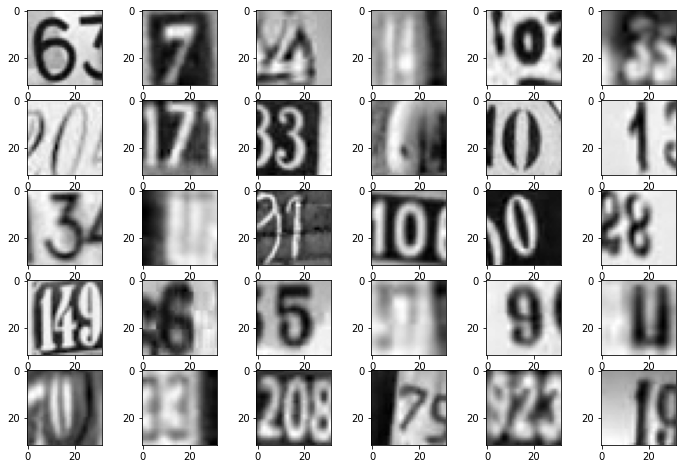

In [113]:
# Visualizing some of the contents of the training data set

fig = plt.figure(figsize = (12, 8))
rows,columns = (5,6)
for i in range(1, rows * columns + 1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

In [114]:
print('Corresponding labels for each of the above image in order : %s' %(y_train[1:31]))

Corresponding labels for each of the above image in order : [6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4 6 5 7 9 1 0 3 0 7 2 1]


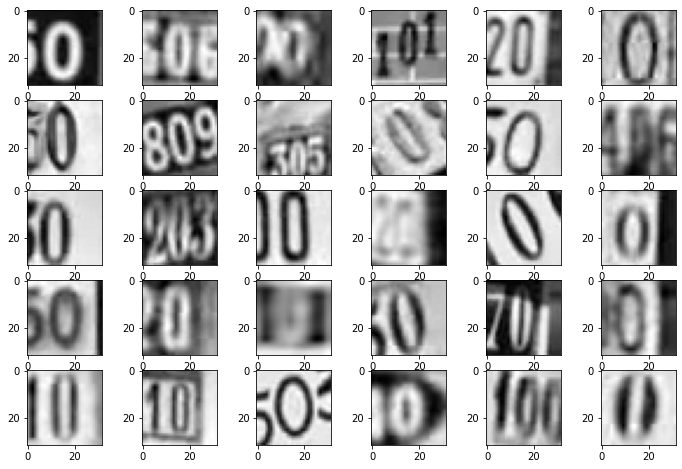

In [115]:
# Visualizing some of the contents of the validation data set

fig = plt.figure(figsize = (12, 8))
rows,columns = (5,6)
for i in range(1, rows * columns + 1):
    img = X_val[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

In [116]:
print('Corresponding labels for each of the above image in order : %s' %(y_val[1:31]))

Corresponding labels for each of the above image in order : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


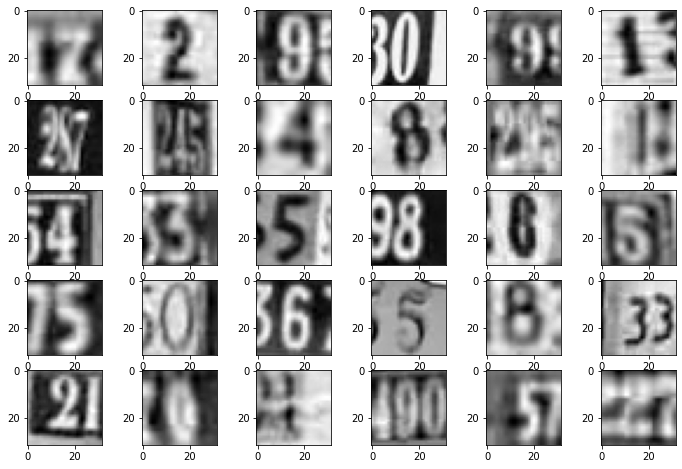

In [117]:
# Visualizing some of the contents of the testing data set

fig = plt.figure(figsize = (12, 8))
rows,columns = (5,6)
for i in range(1, rows * columns + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

In [118]:
print('Corresponding labels for each of the above image in order : %s' %(y_test[1:31]))

Corresponding labels for each of the above image in order : [7 2 9 0 9 1 8 4 4 8 9 1 4 3 5 8 6 5 5 0 6 5 8 3 2 0 1 9 5 2]


Need to reshape the X_train and X_test so that the same can be fed for model building. Currently we have a 3D tensor and we need to feed a 2D tensor into the model.



We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [119]:
# Reshaping the data / Flattening the data so that it can be consumed by ANN

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1)

print('Modified Training data shape', X_train.shape, y_train.shape)
print('Modified Validation data shape', X_val.shape, y_val.shape)
print('Modified Testing data shape', X_test.shape, y_test.shape)

Modified Training data shape (42000, 1024, 1) (42000,)
Modified Validation data shape (60000, 1024, 1) (60000,)
Modified Testing data shape (18000, 1024, 1) (18000,)


In [120]:
# Scaling the inputs for faster processing

X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0
X_test_scaled = X_test / 255.0

In [121]:
# Performing OHE on the output variable so that it can be consumed by the loss function appropraitely

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [122]:
# Displaying the number of possible classes for output variable

print('The number of output classes are:', y_train.shape[1])

The number of output classes are: 10


These are the numbers 0 to 9

## 3. Design, train, tune and test a neural network image classifier

In [123]:
# Function to create multiple ANN models using different values for hyperparameters

def ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag):

    ''' 
    ann_model: Takes a group of variables and creates the model and returns it\n
    
    num_layers : Number of layes in NN\n
    
    hidden_neurons : Number of neurons for first layer which gets halved with increase in each layer\n

    bn_flag : To add Batch Normalisation\n

    activation : Type of activation function\n
    
    do_flag : To add Dropout\n

    do_val : Probability for Dropout\n

    kernel_initializer : Values for weights initialisation\n

    lr : Learning rate\n

    Lambda : Regularisation parameter\n

    optimizer_flag : To choose the optimizer as SGD or Adam\n
    
    '''  

    # Model architecture
    
    output_neurons = 10
        
    model = Sequential()

    if (num_layers == 1) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 2) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 3) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 4) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2) , kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/8), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 5) :
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_dim = X_train_scaled.shape[1]))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2) , kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/8), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/12), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    else:
      print('The number of layers not within desired range')
      return

    sgd = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    adam = keras.optimizers.Adam(learning_rate=lr)
    
    # Compiling model
    
    if optimizer_flag == 1:
      model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    elif optimizer_flag == 2:
      model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model 

**Model 1**

In [124]:
# Choosing the hyperparameters
# Selecting the basic values initially

num_layers = 1 
hidden_neurons = 200
bn_flag = 0
activation = 'sigmoid'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.0001
Lambda = 0
optimizer_flag = 1

In [125]:
model_1 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [126]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 200)               205000    
                                                                 
 activation_31 (Activation)  (None, 200)               0         
                                                                 
 dense_42 (Dense)            (None, 10)                2010      
                                                                 
 activation_32 (Activation)  (None, 10)                0         
                                                                 
Total params: 207,010
Trainable params: 207,010
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Parameter values for fitting the model

epochs = 10
batch_size = 100

In [128]:
# Fitting the model

model_1_fit = model_1.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/10
420/420 [==============================] - 3s 6ms/step - loss: 2.3119 - accuracy: 0.1036 - val_loss: 2.3027 - val_accuracy: 0.1027
Epoch 2/10
420/420 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1015 - val_loss: 2.3025 - val_accuracy: 0.1004
Epoch 3/10
420/420 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1018 - val_loss: 2.3025 - val_accuracy: 0.1003
Epoch 4/10
420/420 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3024 - val_accuracy: 0.1011
Epoch 5/10
420/420 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.1012 - val_loss: 2.3023 - val_accuracy: 0.1015
Epoch 6/10
420/420 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.1014 - val_loss: 2.3023 - val_accuracy: 0.1006
Epoch 7/10
420/420 [==============================] - 2s 5ms/step - loss: 2.3023 - accuracy: 0.1019 - val_loss: 2.3023 - val_accuracy: 0.0998
Epoch 

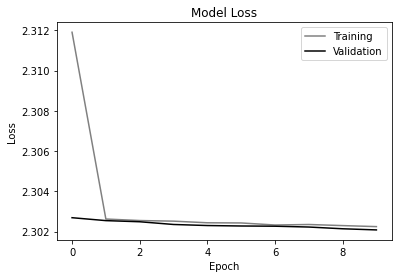

In [129]:
# Summarizing the history for loss

plt.plot(model_1_fit.history['loss'],color = 'Grey')
plt.plot(model_1_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Here we can see that loss is almot stagnant for training and validation data and much improvement can't be seen

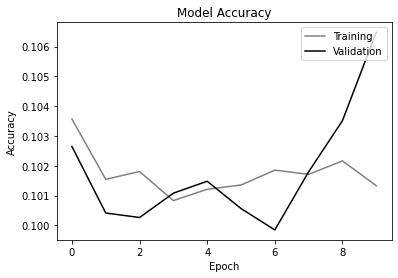

In [130]:
# Summarizing the history for accuracy

plt.plot(model_1_fit.history['accuracy'],color = 'Grey')
plt.plot(model_1_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

As can be seen from the above graph the training and validation accuracy are fluctuating and hence stability can't be seen

**Model 2**

Let's us try to change the activation function to capture non-linearity better and increase the epochs, hidden neurons, layers and batch size

In [131]:
# Choosing the hyperparameters

num_layers = 4 
hidden_neurons = 1200
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'normal'
lr = 0.001
Lambda = 0
optimizer_flag = 1

In [132]:
model_2 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [133]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 1200)              1230000   
                                                                 
 activation_33 (Activation)  (None, 1200)              0         
                                                                 
 dense_44 (Dense)            (None, 600)               720600    
                                                                 
 activation_34 (Activation)  (None, 600)               0         
                                                                 
 dense_45 (Dense)            (None, 300)               180300    
                                                                 
 activation_35 (Activation)  (None, 300)               0         
                                                                 
 dense_46 (Dense)            (None, 150)             

In [134]:
# Parameter values for fitting the model

epochs = 100
batch_size = 300

In [135]:
# Fitting the model

model_2_fit = model_2.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/100
140/140 [==============================] - 2s 9ms/step - loss: 2.3016 - accuracy: 0.1109 - val_loss: 2.2963 - val_accuracy: 0.1248
Epoch 2/100
140/140 [==============================] - 1s 7ms/step - loss: 2.2931 - accuracy: 0.1416 - val_loss: 2.2891 - val_accuracy: 0.1516
Epoch 3/100
140/140 [==============================] - 1s 7ms/step - loss: 2.2852 - accuracy: 0.1735 - val_loss: 2.2808 - val_accuracy: 0.1941
Epoch 4/100
140/140 [==============================] - 1s 7ms/step - loss: 2.2766 - accuracy: 0.2041 - val_loss: 2.2718 - val_accuracy: 0.2369
Epoch 5/100
140/140 [==============================] - 1s 7ms/step - loss: 2.2671 - accuracy: 0.2290 - val_loss: 2.2615 - val_accuracy: 0.2278
Epoch 6/100
140/140 [==============================] - 1s 7ms/step - loss: 2.2553 - accuracy: 0.2463 - val_loss: 2.2470 - val_accuracy: 0.2792
Epoch 7/100
140/140 [==============================] - 1s 7ms/step - loss: 2.2388 - accuracy: 0.2737 - val_loss: 2.2278 - val_accuracy: 0.2943

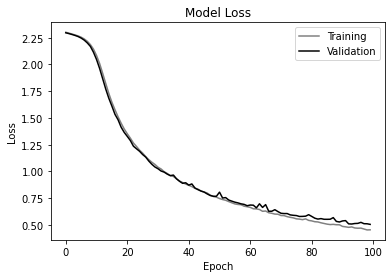

In [136]:
# Summarizing the history for loss

plt.plot(model_2_fit.history['loss'],color = 'Grey')
plt.plot(model_2_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

As we can see that the loss function for both is quite smooth and in sync with better results than the previous model

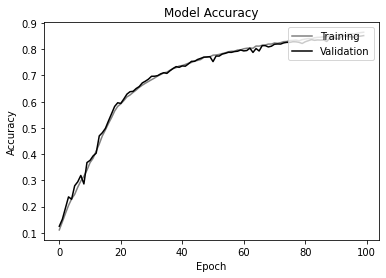

In [137]:
# Summarizing the history for accuracy

plt.plot(model_2_fit.history['accuracy'],color = 'Grey')
plt.plot(model_2_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

As we can see that the accuracy for both is quite smooth and in sync with better results than the previous model

**Model 3**

Let's us try to change the weights initializer and reduce epochs

In [138]:
# Choosing the hyperparameters

num_layers = 4 
hidden_neurons = 1200
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'he_normal'
lr = 0.001
Lambda = 0
optimizer_flag = 1

In [139]:
model_3 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [140]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1200)              1230000   
                                                                 
 activation_38 (Activation)  (None, 1200)              0         
                                                                 
 dense_49 (Dense)            (None, 600)               720600    
                                                                 
 activation_39 (Activation)  (None, 600)               0         
                                                                 
 dense_50 (Dense)            (None, 300)               180300    
                                                                 
 activation_40 (Activation)  (None, 300)               0         
                                                                 
 dense_51 (Dense)            (None, 150)             

In [141]:
# Parameter values for fitting the model

epochs = 20
batch_size = 200

In [142]:
# Fitting the model

model_3_fit = model_3.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/20
210/210 [==============================] - 2s 8ms/step - loss: 2.2753 - accuracy: 0.1655 - val_loss: 2.2296 - val_accuracy: 0.2280
Epoch 2/20
210/210 [==============================] - 1s 6ms/step - loss: 2.1823 - accuracy: 0.2735 - val_loss: 2.1243 - val_accuracy: 0.3322
Epoch 3/20
210/210 [==============================] - 1s 6ms/step - loss: 2.0506 - accuracy: 0.3772 - val_loss: 1.9633 - val_accuracy: 0.4295
Epoch 4/20
210/210 [==============================] - 1s 7ms/step - loss: 1.8654 - accuracy: 0.4490 - val_loss: 1.7686 - val_accuracy: 0.4793
Epoch 5/20
210/210 [==============================] - 1s 7ms/step - loss: 1.6650 - accuracy: 0.5165 - val_loss: 1.5692 - val_accuracy: 0.5443
Epoch 6/20
210/210 [==============================] - 1s 6ms/step - loss: 1.5062 - accuracy: 0.5552 - val_loss: 1.4301 - val_accuracy: 0.5777
Epoch 7/20
210/210 [==============================] - 1s 7ms/step - loss: 1.3780 - accuracy: 0.5954 - val_loss: 1.3250 - val_accuracy: 0.6155
Epoch 

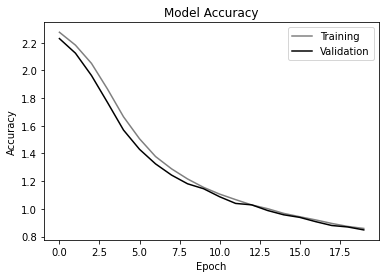

In [143]:
# Summarizing the history for loss

plt.plot(model_3_fit.history['loss'],color = 'Grey')
plt.plot(model_3_fit.history['val_loss'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

As we can see that the loss function for both is quite smooth and in sync with better results than the previous model

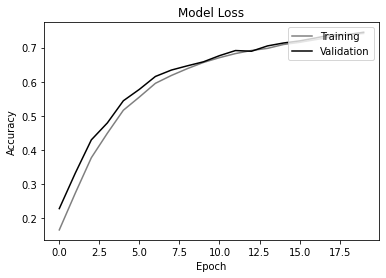

In [144]:
# Summarizing the history for accuracy

plt.plot(model_3_fit.history['accuracy'],color = 'Grey')
plt.plot(model_3_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

We can see that the model is learning slowly but in quite decent number of iterations the accuracies are in sync

**Model 4**

Let's now try to change the optimizer and the learning rate

In [145]:
# Choosing the hyperparameters

num_layers = 2 
hidden_neurons = 500
bn_flag = 0
activation = 'relu'
do_flag = 0
do_val = 0
kernel_initializer = 'he_normal'
lr = 0.0003
Lambda = 0
optimizer_flag = 2

In [146]:
model_4 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [147]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 500)               512500    
                                                                 
 activation_43 (Activation)  (None, 500)               0         
                                                                 
 dense_54 (Dense)            (None, 250)               125250    
                                                                 
 activation_44 (Activation)  (None, 250)               0         
                                                                 
 dense_55 (Dense)            (None, 10)                2510      
                                                                 
 activation_45 (Activation)  (None, 10)                0         
                                                                 
Total params: 640,260
Trainable params: 640,260
Non-t

In [148]:
# Parameter values for fitting the model

epochs = 100
batch_size = 100

In [149]:
# Fitting the model

model_4_fit = model_4.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/100
420/420 [==============================] - 3s 7ms/step - loss: 2.0457 - accuracy: 0.2904 - val_loss: 1.5855 - val_accuracy: 0.5052
Epoch 2/100
420/420 [==============================] - 2s 6ms/step - loss: 1.3668 - accuracy: 0.5810 - val_loss: 1.2124 - val_accuracy: 0.6271
Epoch 3/100
420/420 [==============================] - 2s 6ms/step - loss: 1.1394 - accuracy: 0.6537 - val_loss: 1.0711 - val_accuracy: 0.6766
Epoch 4/100
420/420 [==============================] - 2s 6ms/step - loss: 1.0396 - accuracy: 0.6827 - val_loss: 0.9912 - val_accuracy: 0.7003
Epoch 5/100
420/420 [==============================] - 2s 6ms/step - loss: 0.9593 - accuracy: 0.7066 - val_loss: 0.9120 - val_accuracy: 0.7275
Epoch 6/100
420/420 [==============================] - 2s 6ms/step - loss: 0.8985 - accuracy: 0.7265 - val_loss: 0.8566 - val_accuracy: 0.7411
Epoch 7/100
420/420 [==============================] - 2s 6ms/step - loss: 0.8541 - accuracy: 0.7391 - val_loss: 0.8522 - val_accuracy: 0.7349

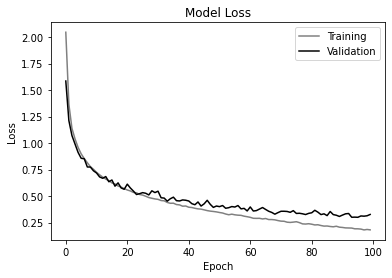

In [150]:
# Summarizing the history for loss

plt.plot(model_4_fit.history['loss'],color = 'Grey')
plt.plot(model_4_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Both the loss is the least for this model and also both the values are in almost sync with slight fluctuations

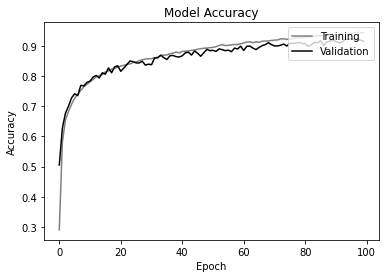

In [151]:
# Summarizing the history for accuracy

plt.plot(model_4_fit.history['accuracy'],color = 'Grey')
plt.plot(model_4_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Though this model has the second best accuracies but its more stable than the model which has both the accuracies highest.So, we will choose this model as our final model

**Model 5** 

Let's add Dropout and check the results

In [152]:
# Choosing the hyperparameters

num_layers = 4 
hidden_neurons = 1200
bn_flag = 0
activation = 'relu'
do_flag = 1
do_val = 0.2
kernel_initializer = 'he_normal'
lr = 0.001
Lambda = 0
optimizer_flag = 2

In [153]:
model_5 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [154]:
model_5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1200)              1230000   
                                                                 
 activation_46 (Activation)  (None, 1200)              0         
                                                                 
 dropout_8 (Dropout)         (None, 1200)              0         
                                                                 
 dense_57 (Dense)            (None, 600)               720600    
                                                                 
 activation_47 (Activation)  (None, 600)               0         
                                                                 
 dropout_9 (Dropout)         (None, 600)               0         
                                                                 
 dense_58 (Dense)            (None, 300)             

In [155]:
# Parameter values for fitting the model

epochs = 20
batch_size = 100

In [156]:
# Fitting the model

model_5_fit = model_5.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/20
420/420 [==============================] - 4s 7ms/step - loss: 2.3187 - accuracy: 0.0986 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 2/20
420/420 [==============================] - 3s 6ms/step - loss: 2.3032 - accuracy: 0.1018 - val_loss: 2.3030 - val_accuracy: 0.1001
Epoch 3/20
420/420 [==============================] - 3s 6ms/step - loss: 2.2824 - accuracy: 0.1073 - val_loss: 2.2193 - val_accuracy: 0.1414
Epoch 4/20
420/420 [==============================] - 3s 6ms/step - loss: 2.1853 - accuracy: 0.1519 - val_loss: 2.0839 - val_accuracy: 0.2000
Epoch 5/20
420/420 [==============================] - 3s 6ms/step - loss: 2.1276 - accuracy: 0.1804 - val_loss: 2.0575 - val_accuracy: 0.2123
Epoch 6/20
420/420 [==============================] - 3s 6ms/step - loss: 2.1103 - accuracy: 0.1854 - val_loss: 2.0404 - val_accuracy: 0.2285
Epoch 7/20
420/420 [==============================] - 3s 6ms/step - loss: 2.0994 - accuracy: 0.1919 - val_loss: 2.0404 - val_accuracy: 0.2212
Epoch 

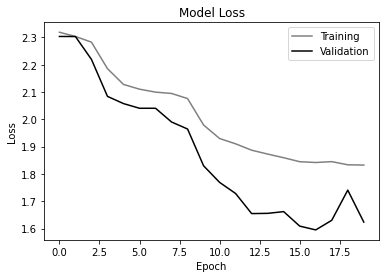

In [157]:
# Summarizing the history for loss

plt.plot(model_5_fit.history['loss'],color = 'Grey')
plt.plot(model_5_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

We can see that the loss function is quite unstable.We can see that using Dropout didn't go so well with the previously used architectures

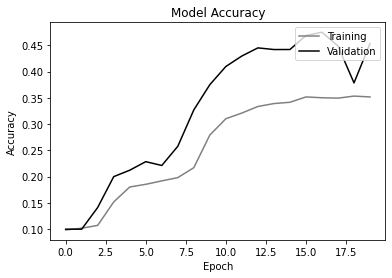

In [158]:
# Summarizing the history for accuracy

plt.plot(model_5_fit.history['accuracy'],color = 'Grey')
plt.plot(model_5_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Same goes for accuracy which shows the instability of the model

**Model 6**

Let's try changing activation function and Lambda 

In [159]:
# Choosing the hyperparameters

num_layers = 4 
hidden_neurons = 2000
bn_flag = 0
activation = keras.layers.LeakyReLU(alpha=0.01)
do_flag = 0
do_val = 0
kernel_initializer = 'he_normal'
lr = 0.0003
Lambda = 2e-3
optimizer_flag = 2

In [160]:
model_6 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [161]:
model_6.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 2000)              2050000   
                                                                 
 activation_51 (Activation)  (None, 2000)              0         
                                                                 
 dense_62 (Dense)            (None, 1000)              2001000   
                                                                 
 activation_52 (Activation)  (None, 1000)              0         
                                                                 
 dense_63 (Dense)            (None, 500)               500500    
                                                                 
 activation_53 (Activation)  (None, 500)               0         
                                                                 
 dense_64 (Dense)            (None, 250)             

In [162]:
# Parameter values for fitting the model

epochs = 100
batch_size = 100

In [163]:
# Fitting the model

model_6_fit = model_6.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/100
420/420 [==============================] - 4s 8ms/step - loss: 1.7724 - accuracy: 0.3907 - val_loss: 1.2835 - val_accuracy: 0.5865
Epoch 2/100
420/420 [==============================] - 3s 7ms/step - loss: 1.0910 - accuracy: 0.6668 - val_loss: 0.9509 - val_accuracy: 0.7123
Epoch 3/100
420/420 [==============================] - 3s 7ms/step - loss: 0.9293 - accuracy: 0.7178 - val_loss: 0.8173 - val_accuracy: 0.7580
Epoch 4/100
420/420 [==============================] - 3s 7ms/step - loss: 0.8408 - accuracy: 0.7459 - val_loss: 0.7604 - val_accuracy: 0.7739
Epoch 5/100
420/420 [==============================] - 3s 7ms/step - loss: 0.7623 - accuracy: 0.7725 - val_loss: 0.7531 - val_accuracy: 0.7733
Epoch 6/100
420/420 [==============================] - 3s 7ms/step - loss: 0.7082 - accuracy: 0.7889 - val_loss: 0.6642 - val_accuracy: 0.8037
Epoch 7/100
420/420 [==============================] - 3s 6ms/step - loss: 0.6708 - accuracy: 0.7987 - val_loss: 0.6015 - val_accuracy: 0.8266

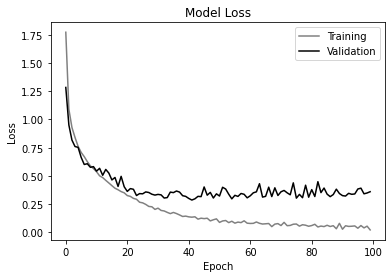

In [164]:
# Summarizing the history for loss

plt.plot(model_6_fit.history['loss'],color = 'Grey')
plt.plot(model_6_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Here we can see that the training loss is the least of all but validation loss is second best of all the models implemented.The values are decently syncing but this is second best stable model out of all

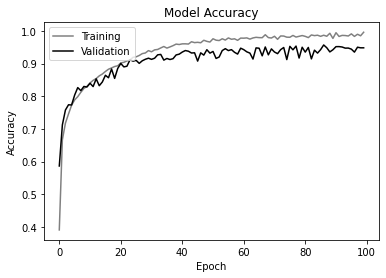

In [165]:
# Summarizing the history for accuracy

plt.plot(model_6_fit.history['accuracy'],color = 'Grey')
plt.plot(model_6_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Though the model seems quite stable, value are in sync and accuracies are the highest but still the model 4 is more stable and hence we go for that as our final model as the values are better for validation data

**Model 7**

Let's add Batch Normalisation now and check the results

In [166]:
# Choosing the hyperparameters

num_layers = 4 
hidden_neurons = 2000
bn_flag = 1
activation = keras.layers.LeakyReLU(alpha=0.01)
do_flag = 0
do_val = 0
kernel_initializer = 'he_normal'
lr = 0.0003
Lambda = 0
optimizer_flag = 2

In [167]:
model_7 = ann_model(num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [168]:
model_7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 2000)              2050000   
                                                                 
 batch_normalization_8 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 activation_56 (Activation)  (None, 2000)              0         
                                                                 
 dense_67 (Dense)            (None, 1000)              2001000   
                                                                 
 batch_normalization_9 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 activation_57 (Activation)  (None, 1000)            

In [169]:
# Parameter values for fitting the model

epochs = 20
batch_size = 150

In [170]:
# Fitting the model

model_7_fit = model_7.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val), epochs=epochs, batch_size=batch_size, verbose = 1)

Epoch 1/20
280/280 [==============================] - 4s 10ms/step - loss: 1.1725 - accuracy: 0.6262 - val_loss: 1.4045 - val_accuracy: 0.5508
Epoch 2/20
280/280 [==============================] - 2s 8ms/step - loss: 0.7070 - accuracy: 0.7788 - val_loss: 1.1582 - val_accuracy: 0.6258
Epoch 3/20
280/280 [==============================] - 2s 8ms/step - loss: 0.5682 - accuracy: 0.8230 - val_loss: 1.0299 - val_accuracy: 0.6628
Epoch 4/20
280/280 [==============================] - 2s 8ms/step - loss: 0.4915 - accuracy: 0.8443 - val_loss: 1.2645 - val_accuracy: 0.5816
Epoch 5/20
280/280 [==============================] - 2s 8ms/step - loss: 0.4225 - accuracy: 0.8680 - val_loss: 1.3203 - val_accuracy: 0.5734
Epoch 6/20
280/280 [==============================] - 2s 8ms/step - loss: 0.3782 - accuracy: 0.8808 - val_loss: 0.9250 - val_accuracy: 0.6902
Epoch 7/20
280/280 [==============================] - 2s 8ms/step - loss: 0.3374 - accuracy: 0.8926 - val_loss: 1.0056 - val_accuracy: 0.6668
Epoch

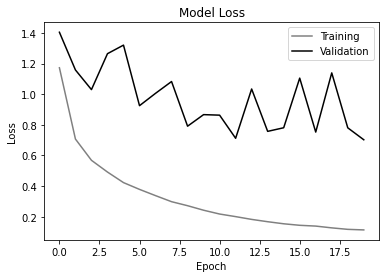

In [171]:
# Summarizing the history for loss

plt.plot(model_7_fit.history['loss'],color = 'Grey')
plt.plot(model_7_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

We can see here that the model is overfitting on training and doesn't perform optimally on validation data

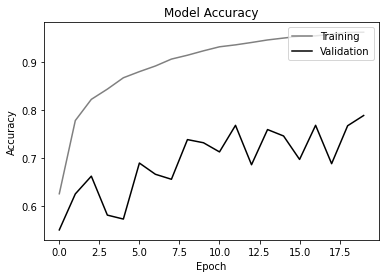

In [172]:
# Summarizing the history for accuracy

plt.plot(model_7_fit.history['accuracy'],color = 'Grey')
plt.plot(model_7_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

We can see that with Batch Normalisation the data is overfitting without any regularization and the model doesn't seem very stable

Finally, the best model comes out to be **Model 4**

In [173]:
final_model = model_4 # Model 2 and Model 6 were also tested on test data but Model 4 gave the best results

Let's see the final chosen model's performance on the test data set

In [174]:
scores = final_model.evaluate(X_test_scaled, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6717064380645752
Accuracy: 0.8420555591583252


Here we can see that the model performs quite well on test data set as well